<a href="https://colab.research.google.com/github/Aminfaraji/dataset_images_IDPL/blob/main/classification_IDPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import glob,os,shutil,random
import tensorflow as tf
from google.colab.patches import cv2_imshow
from keras.layers import *
from keras import *
from keras.applications.efficientnet import *
from keras.utils import load_img,img_to_array
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.ops import losses
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train=ImageDataGenerator(rescale=1/255.0)
                        #  zoom_range=20,
                        #  rotation_range=45,
                        #  width_shift_range=.2,
                        #  height_shift_range=0.2,
                        #  shear_range=0.2,
                        #  horizontal_flip=True,
                        #  fill_mode='constant',
                        #  cval=125)
test=ImageDataGenerator(rescale=1/255.0)
                        #  zoom_range=20,
                        #  rotation_range=45,
                        #  width_shift_range=.2,
                        #  height_shift_range=0.2,
                        #  shear_range=0.2,
                        #  horizontal_flip=True,
                        #  fill_mode='constant',
                        #  cval=125)
train_gen=train.flow_from_directory(
    "/content/drive/MyDrive/without background/train",
    target_size=(112,112),
    batch_size=20,
    class_mode='sparse'
)
test_gen=test.flow_from_directory(
    "/content/drive/MyDrive/without background/test",
    target_size=(112,112),
    batch_size=20,
    class_mode='sparse'
)

Found 12484 images belonging to 21 classes.
Found 630 images belonging to 21 classes.


In [3]:
class_names=['Bank Document1',
 'Bank Document2',
 'Bank Document3',
 'Bank Document4',
 'Birth Certificate1_page1',
 'Birth Certificate1_page2',
 'Birth Certificate2_page1',
 'Birth Certificate2_page2',
 'Birth Certificate2_page3',
 'Birth Certificate2_page4',
 'Electricity Bill',
 'Gas Bill',
 'Identity Card1',
 'Identity Card2',
 'Military  Service Card1',
 'Military  Service Card2',
 'New paper',
 'Water Bill',
 'magazine',
 'paper',
 'passport']

In [4]:
model=tf.keras.applications.VGG16(False,input_shape=(112,112,3))
model.trainable=False


x=Flatten()(model.output)
x=Dense(64,activation='relu')(x)
x=BatchNormalization()(x)
x=Dropout(.25)(x)

x=Dense(64,activation='relu')(x)
x=BatchNormalization()(x)
x=Dropout(.25)(x)


x=Dense(21,'softmax')(x)

model=Model(inputs=model.input,outputs=x)
# model.summary()

58889256/58889256 [==============================] - 0s 0us/step


In [5]:
from keras.losses import SparseCategoricalCrossentropy
loss_=SparseCategoricalCrossentropy(from_logits=False)
model.compile('adam',loss=loss_,metrics=['acc'])
model.load_weights("/content/drive/MyDrive/model_IDPL.h5")

In [ ]:
# history = model.fit_generator(train_gen,
#                               steps_per_epoch=20,
#                               epochs=10,
#                               validation_data=test_gen,
#                               validation_steps=10)

In [ ]:
# model.save_weights("/content/drive/MyDrive/model_IDPL.h5")

In [17]:
# img_test,classes=test_gen[5][0][15],test_gen[5][1][15]
# img_test=img_test.reshape((1,112,112,3))
# images=glob.glob("/content/drive/MyDrive/without background/test/passport/*")
# for img in images:
#   img_test=img_to_array(load_img(img,target_size=(112,112))).reshape((1,112,112,3))/255
#   print(class_names[model.predict(img_test).argmax()])
img_test=img_to_array(load_img("/content/IMG_20221014_084533.jpg",target_size=(112,112))).reshape((1,112,112,3))/255

In [18]:
class_names[model.predict(img_test).argmax()]
# model.evaluate_generator(test_gen)

1/1 [==============================] - 0s 16ms/step


'magazine'

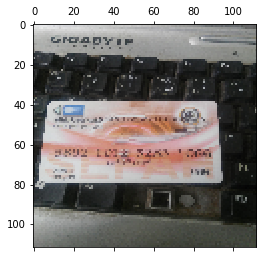

In [19]:
plt.matshow(img_test.reshape((112,112,3)))